In [15]:
setwd('/import/mdd.rna')

In [16]:
load('GSE101521.rda')

In [17]:
library(tibble)

In [18]:
ls()

[1] "cli"   "expr3"

In [19]:
head(cli,2)

,V1,V2,V3,V4
,<chr>,<chr>,<int>,<chr>
1,V35,MDD,19,Male
2,V36,MDD,67,Male


In [20]:
rownames(expr3) = expr3[,1]

In [21]:
expr3  = expr3[,-1] %>% t() %>%  as.data.frame() %>%  tibble::rownames_to_column(.,'sample')

In [22]:
head(expr3,2)

,sample,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,...,SLC25A53,LOC100422106,MIR1470,SSX4B,LOC100887072,KCNQ1OT1,LOC122539214,ZNF528-AS1,RNF225,EGLN2
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,V1,77.65913,1.493445,321.0906,135.9035,70.19191,22.401672,106.0346,106.03458,480.8892,...,0,0,0,0,2.986890,2438.795,29.86890,56.75090,0,73.17880
2,V2,83.61358,0.000000,250.8407,141.0199,76.12580,8.735747,72.3819,78.62172,391.8607,...,0,0,0,0,9.983711,2470.968,41.18281,32.44706,0,82.36562


In [24]:
colnames(cli) = c('sample','Condition','age','sex')

In [26]:
head(cli,2)

,sample,Condition,age,sex
,<chr>,<chr>,<int>,<chr>
1,V35,MDD,19,Male
2,V36,MDD,67,Male


In [29]:
dataset = merge(cli,expr3,by = 'sample')

In [30]:
atpase = grep('^ATP',colnames(dataset),value =T)

In [31]:
atpase

[1] "ATP2C1"          "ATP1A2"          "ATP6V0A1"        "ATP6V1H"        
  [5] "ATP9A"           "ATP11B"          "ATP2B4"          "ATP2C2"         
  [9] "ATP2B3"          "ATP11A"          "ATP1B3"          "ATP2B1"         
 [13] "ATP6AP1"         "ATP2A3"          "ATP12A"          "ATP8B1"         
 [17] "ATP5F1D"         "ATP6V1D"         "ATP1B4"          "ATP11C"         
 [21] "ATP8B4"          "ATP1A3"          "ATP4A"           "ATP13A1"        
 [25] "ATP6V0A4"        "ATP5F1B"         "ATP6V0E1"        "ATP6V1A"        
 [29] "ATP6V1B1"        "ATP5PB"          "ATP6V0B"         "ATP10B"         
 [33] "ATP7B"           "ATPAF1"          "ATP5F1E"         "ATP8A1"         
 [37] "ATP13A4"         "ATP6V1F"         "ATP1B2"          "ATP8B3"         
 [41] "ATP5IF1"         "ATP6V1E1"        "ATP1A4"          "ATP8A2"         
 [45] "ATP13A3"         "ATP5MC2"         "ATP6V1G1"        "ATP1B1"         
 [49] "ATP8B2"          "ATP6V1C2"        "ATP10D"          "ATP6V1B2"       
 [53] "ATP6V0D2"        "ATPSCKMT"        "ATP6V1G3"        "ATP5F1A"        
 [57] "ATP5MC3"         "ATP5PF"          "ATP6V1C1"        "ATP5MJ"         
 [61] "ATP2B2"          "ATP5POP1"        "ATP5MC1"         "ATP13A2"        
 [65] "ATP6V0D1"        "ATP1A1"          "ATP7A"           "ATP5F1C"        
 [69] "ATP9B"           "ATP23"           "ATP5MG"          "ATP5PD"         
 [73] "ATP5ME"          "ATP6V0E2"        "ATPAF2"          "ATP5MK"         
 [77] "ATP2A2"          "ATP8B5P"         "ATP6AP2"         "ATP6V0A2"       
 [81] "ATP6V0C"         "ATP4B"           "ATP13A5"         "ATP2A1"         
 [85] "ATP6AP1-DT"      "ATP11AUN"        "ATP6"            "ATP1A1-AS1"     
 [89] "ATP6V0E2-AS1"    "ATP10A"          "ATP6V1G2"        "ATP5PDP3"       
 [93] "ATP5PBP4"        "ATP5PBP2"        "ATP5F1CP1"       "ATP5MFP1"       
 [97] "ATP5PBP1"        "ATP6V0E1P1"      "ATP5F1AP2"       "ATP6V0E1P4"     
[101] "ATP8"            "ATP5PDP2"        "ATP8A2P2"        "ATP5F1BP1"      
[105] "ATP11A-AS1"      "ATP6V1G1P4"      "ATP5F1AP8"       "ATP5F1AP1"      
[109] "ATP6V1B1-AS1"    "ATP5MF"          "ATP5F1AP7"       "ATP5PO"         
[113] "ATP5MF-PTCD1"    "ATP5MGL"         "ATP5MGP3"        "ATP6V1E2"       
[117] "ATP6V1G1P2"      "ATP6V1G2-DDX39B" "ATP5F1AP4"       "ATP2A1-AS1"     
[121] "ATP2C2-AS1"      "ATP5PDP1"        "ATP5F1AP3"       "ATP8B1-AS1"     
[125] "ATP5MGP7"

In [32]:
my_comparisons = list(c('Contreol','MD'))

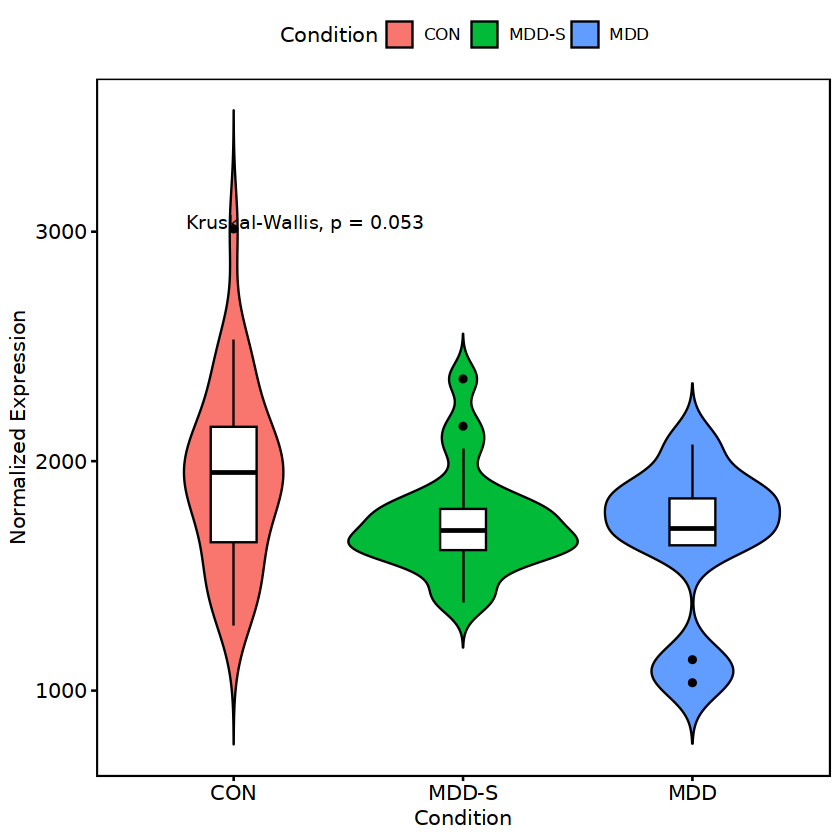

In [64]:
library(ggpubr)
dataset %>% 
  #dplyr::filter(group %in% c("IBC","N","DCIS")) %>% 
  ggviolin(x = "Condition", y = c('ATP2C1'), fill = "Condition",
           combine = T,
         #palette = c("#00AFBB", "#E7B800", "#FC4E07"),##
         ylab="Normalized Expression",
         add = "boxplot", add.params = list(fill = "white"))+
stat_compare_means()

In [34]:
head(dataset,2)

,sample,Condition,age,sex,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,...,SLC25A53,LOC100422106,MIR1470,SSX4B,LOC100887072,KCNQ1OT1,LOC122539214,ZNF528-AS1,RNF225,EGLN2
,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,V1,CON,17,Male,77.65913,1.493445,321.0906,135.9035,70.19191,22.40167,...,0,0,0,0,2.986890,2438.795,29.86890,56.75090,0,73.1788
2,V10,MDD-S,59,Female,162.05316,4.209173,185.2036,147.3211,162.05316,29.46421,...,0,0,0,0,8.418346,5069.949,98.91557,79.97429,0,187.3082


In [44]:
dataset1 = dataset %>%  dplyr::select(c(1,5:33718)) 

In [45]:
rownames(dataset1) = dataset1[,1]

In [46]:
dataset1 = dataset1[,-1]

In [47]:
head(dataset1,2)

,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,SLC25A53,LOC100422106,MIR1470,SSX4B,LOC100887072,KCNQ1OT1,LOC122539214,ZNF528-AS1,RNF225,EGLN2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
V1,77.65913,1.493445,321.0906,135.9035,70.19191,22.40167,106.0346,106.0346,480.8892,270.3135,...,0,0,0,0,2.986890,2438.795,29.86890,56.75090,0,73.1788
V10,162.05316,4.209173,185.2036,147.3211,162.05316,29.46421,178.8899,193.6220,1144.8951,620.8530,...,0,0,0,0,8.418346,5069.949,98.91557,79.97429,0,187.3082


In [51]:
kegg_list = list(atpase)
gene.set1 = t(dataset1)
gene.set1=as.matrix(gene.set1)
library(GSVA)

In [52]:

kegg2 <- gsva(gene.set1, kegg_list, kcdf="Gaussian",method = "gsva",parallel.sz=12)

Warning message:
"useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE."
Warning message in .filterFeatures(expr, method):
"2208 genes with constant expression values throuhgout the samples."
Warning message in .filterFeatures(expr, method):
"Since argument method!="ssgsea", genes with constant expression values are discarded."


Setting parallel calculations through a MulticoreParam back-end
with workers=12 and tasks=100.
Estimating GSVA scores for 1 gene sets.
Estimating ECDFs with Gaussian kernels
Estimating ECDFs in parallel on 12 cores


iteration: 
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100




  |======================================================================| 100%



In [53]:
dd = kegg2 %>%  t() %>%  as.data.frame()  %>%  rownames_to_column(.,'sample')

In [54]:
colnames(dd) = c('sample','score')

In [55]:
cc = merge(cli,dd,by = 'sample')

In [56]:
my_comparisons = list(c('Contreol','MD'))

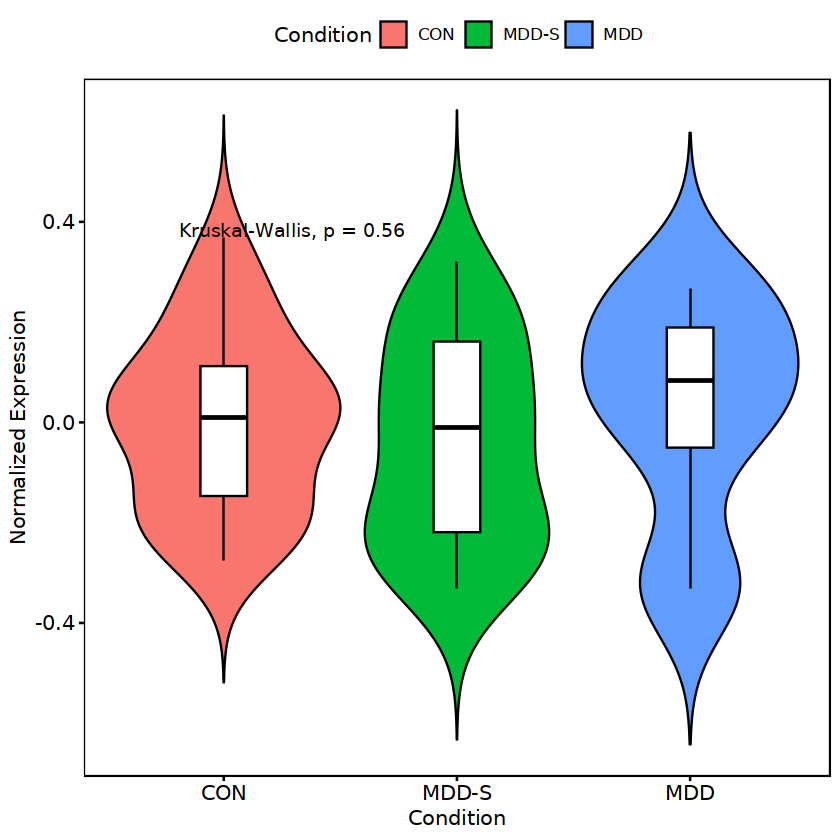

In [57]:
library(ggpubr)
cc %>% 
  #dplyr::filter(group %in% c("IBC","N","DCIS")) %>% 
  ggviolin(x = "Condition", y = c('score'), fill = "Condition",
           combine = T,
         #palette = c("#00AFBB", "#E7B800", "#FC4E07"),##
         ylab="Normalized Expression",
         add = "boxplot", add.params = list(fill = "white"))+
stat_compare_means()

In [48]:
library("pheatmap")
library("RColorBrewer")

In [59]:
data=log2(dataset1+1) #对基因表达量数据处理
data <- data %>% t() %>% as.matrix(data)  %>% na.omit()

In [64]:
data = data[apply(data, 1, function(x) sd(x)!=0),] 

# 删掉标准差为0的列
data = data[,apply(data, 2, function(x) sd(x)!=0)] 

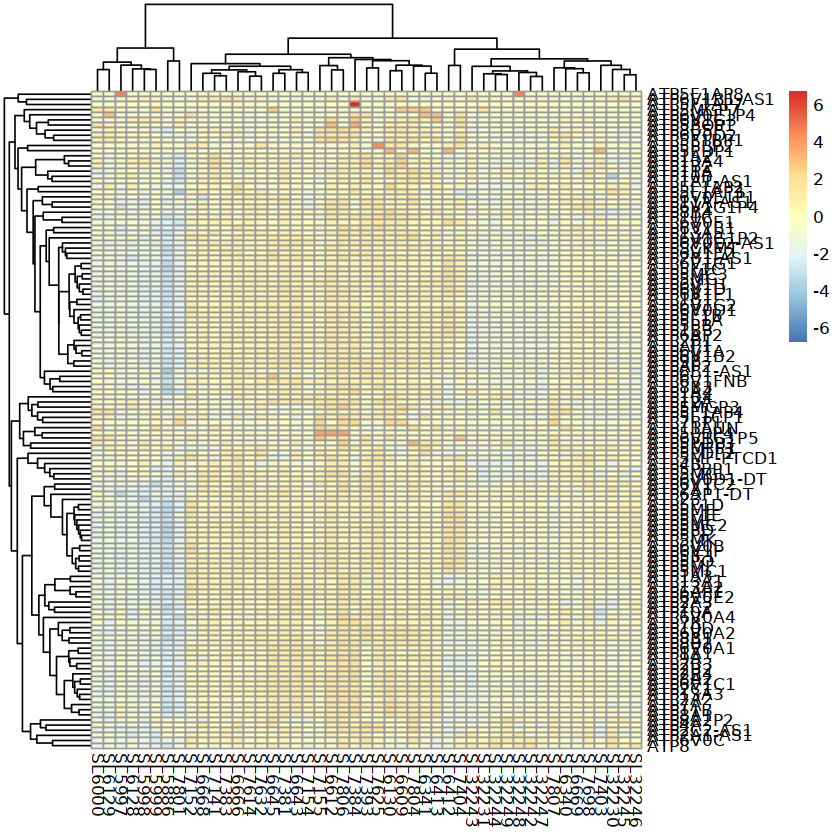

In [65]:
pheatmap(data,scale = 'row') 

In [74]:
library(GSEABase)
library(clusterProfiler)
#library(GSEA)

In [71]:
head(dataset1,2)

,ATP2C1,ATP1A2,ATP6V0A1,ATP6V1H,ATP9A,ATP11B,ATP2B4,ATP2C2,ATP2B3,ATP11A,...,ATP2C2-AS1,ATP5PDP1,ATP5F1AP3,ATP8B1-AS1,ATP5MGP7,ATP6V0D1-DT,ATP7BP1,ATP6V1G1P5,ATP2B1-AS1,ATP6V1FNB
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
SL32230,3180,13986,17025,4240,18502,905,10265,117,4921,2209,...,29,0,17,17,0,133,0,0,881,386
SL32231,2791,21259,17141,3759,21792,753,8966,162,6996,1241,...,19,0,4,5,1,67,0,0,447,190
